# Caracterização meteorológica da área de estudo

Aluna: Bruna Boscato Toscani

Nesta atividade caracterizaremos a meteorologia da área de estudo. Avaliaremos os seguintes pontos:

1. Meteorologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

## Meteorologia de superfície
Analisaremos os dados de metar (estação meteorológica em aeroportos). 
<br>Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR .
<br>Faça seu login e colete o dado para o período de 01/01/2023 a 01/01/2024.
<br>Os dados estarão na pasta de inputs/meteoSuperficie com a nomenclatura metar.csv

In [29]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241
C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\inputs\meteoSuperficie
['metar.csv.csv']


In [30]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [31]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


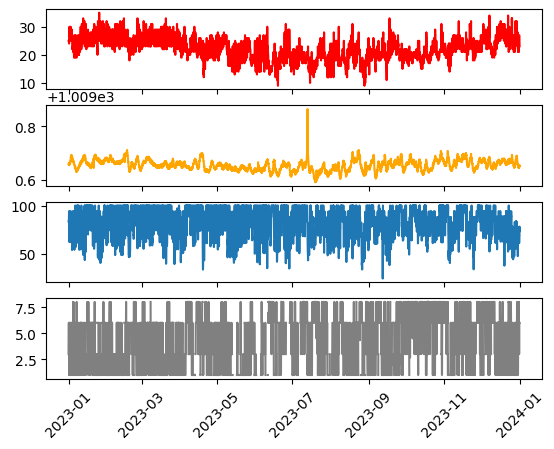

In [32]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

O percentil 99 da temperatura é:31.0
O percentil 99 da pressão é:1009.6967607391396
O percentil 99 da relh é:100.0
O percentil 99 da cco é:nan


TypeError: 'dict' object is not callable

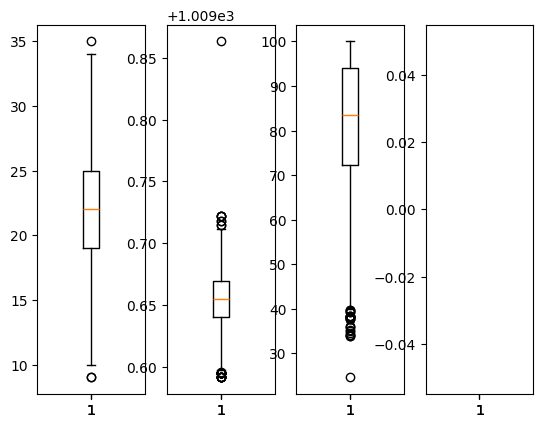

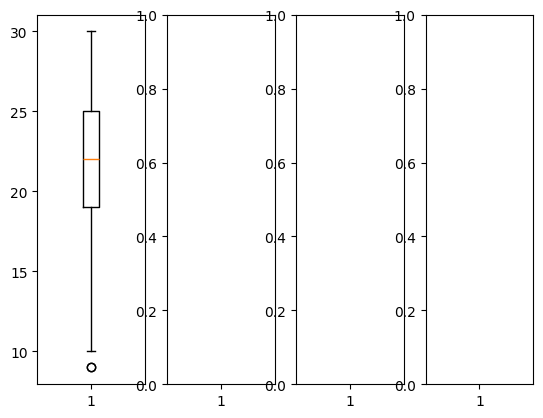

In [33]:
# Fazendo boxplot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])

# Removendo valores acima do percentil 95°
import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é:' + str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é:' + str(p99))
relh99 = np.percentile(metSuperficie['relh'],99)
print('O percentil 99 da relh é:' + str(relh99))
cco99 = np.percentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é:' + str(cco99))

fig,ax = plt.subplots(1,4,sharex=True)
ax[0].boxplot(metSuperficie['temp'][metSuperficie['temp']<temp99]) (...)
ax[1].boxplot(metSuperficie['p'][metSuperficie['p']<p99])
ax[2].boxplot(metSuperficie['relh'][metSuperficie['relh']<relh99])
ax[3].boxplot(metSuperficie['cco'][metSuperficie['cco']<relh99])

In [ ]:
# Estatísticas dos dados
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotando figura após fazer a média mensal
fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(media_mensal['datetime'],media_mensal['temp'],color='red')
ax[1].plot(media_mensal['datetime'],media_mensal['p'],color='orange')
ax[2].plot(media_mensal['datetime'],media_mensal['relh'])
ax[3].plot(media_mensal['datetime'],media_mensal['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

print(media_mensal)

In [ ]:
# Criando minha rosa dos ventos 
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie (...)
ax.set_legend()

# Análise upperair/sondagem/perfil da atmosfera
Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a ciclioteca Siphon do python

# Análise de dados no espaço 

